In [22]:
import os
import mido
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def get_midis():
    ms = []

    directory = "data"
    for foldername in os.listdir(directory):
        directory = os.path.join("data", foldername)
        for filename in os.listdir(directory):
            if('V2'in filename): continue
            if os.path.isfile(os.path.join(directory, filename)):
                ms.append(os.path.join(directory, filename))
                # print(filename)
    return ms

midis = get_midis()

print(midis[:5])
print(len(midis))

['data\\albeniz\\alb_esp1.mid', 'data\\albeniz\\alb_esp2.mid', 'data\\albeniz\\alb_esp3.mid', 'data\\albeniz\\alb_esp4.mid', 'data\\albeniz\\alb_esp5.mid']
295


In [24]:
def createMidiFileWithAllMessages(notes, starts, velocity, fileName):
    file = mido.MidiFile()

    track = mido.MidiTrack()
    file.tracks.append(track)

    for i in range(len(notes)):
        # print(notes[n][i], starts[n][i], velocity[n][i])
        
        track.append(mido.Message('note_on', note=notes[i], velocity=velocity[i], time=starts[i]))
        
    file.save(fileName)

In [25]:
# works only with files with just one track
def get_all_messages_one_file(midi_file):
    file = mido.MidiFile(midi_file)
    track = file.tracks[1]
    messages = []
    for message in track:
        # print(f'\t{message.type}: {message.dict()}')
        if(message.type == 'note_on' or message.type == 'note_off'):
            # print(f'\t{message.dict()}')
            messages.append(message)
            # track.remove(message)
    
    notes = [0] + [m.note for m in messages] + [1]
    starts = [0] + [m.time for m in messages] + [1]
    vels = [0] + [m.velocity == 0 for m in messages] + [1]

    return notes, starts, vels


In [26]:
all_messages_all_files = [get_all_messages_one_file(m) for m in midis]
print(len(all_messages_all_files))

295


In [27]:
def get_data(messages):
    notes, starts, vels = zip(*messages)
    notes = np.concatenate(notes)
    starts = np.concatenate(starts)
    vels = np.concatenate(vels)
    print(len(notes))
    return notes, starts, vels

notes, starts, vels = get_data(all_messages_all_files)

print(len(starts[starts > 2000]))

763088
491


--> il y a 763088 messages

763088 763088 763088
107 155520 1
0 0 0
72.55229409976307 81.6041622984505 0.5
72.0 0.0 0.5


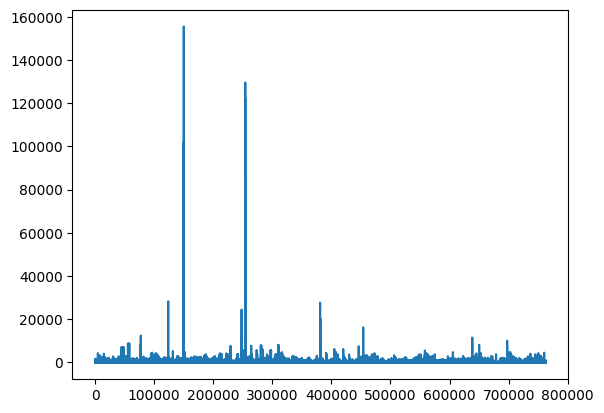

In [28]:
print(len(notes), len(starts), len(vels))
print(np.max(notes), np.max(starts), np.max(vels))
print(np.min(notes), np.min(starts), np.min(vels))
print(np.mean(notes), np.mean(starts), np.mean(vels))
print(np.median(notes), np.median(starts), np.median(vels))


plt.plot(starts)

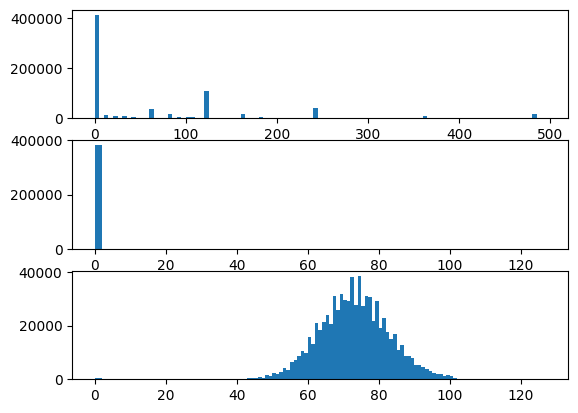

In [29]:
fig, axs = plt.subplots(3)
axs[0].hist(starts, bins=range(0,500, 5))
axs[1].hist(vels, bins=range(128))
axs[2].hist(notes, bins=range(128))


plt.show()


In [30]:
sorted_notes = np.sort(notes.copy())
sorted_starts = np.sort(starts.copy())
sorted_vels = np.sort(vels.copy())

print(sorted_notes[-10:])
print(sorted_starts[-10:])
print(sorted_vels[-10:])


[105 105 105 105 105 105 106 106 107 107]
[ 24000  24480  27720  28320  51840 101760 122400 127680 129600 155520]
[1 1 1 1 1 1 1 1 1 1]


In [31]:
# find some statistics
def show_statistics(arr):
    unique_starts = np.unique(arr, return_counts=True)
    # print(starts_extreme)
    sorted_notes = np.argsort(unique_starts[1].copy())
    counts = unique_starts[1][sorted_notes]
    vals = unique_starts[0][sorted_notes]

    print(list(arr[:10]))
    print(list(zip(vals, counts)))

    print('taille : ', len(counts))
    print('nb apparition le plus souvent : ', np.max(counts))
    print("nb d'apparition le moins souvent : ", np.min(counts))
    print('apparait moins de 100 fois : ', len(counts[counts <= 100]))
    print('mediane des apparitions : ', np.median(counts))

## Notes

{1: 295, 24: 2, 26: 8, 27: 2, 28: 2, 29: 4, 30: 4, 31: 4, 32: 10, 33: 20, 34: 20, 35: 24, 36: 20, 37: 22, 38: 44, 39: 98, 40: 38, 41: 228, 42: 80, 43: 386, 44: 330, 45: 388, 46: 772, 47: 610, 48: 1710, 49: 1262, 50: 2216, 51: 2126, 52: 2630, 53: 4258, 54: 3474, 55: 6606, 56: 7018, 57: 8654, 58: 10562, 59: 9738, 60: 15806, 61: 13322, 62: 21076, 63: 18284, 64: 21382, 65: 23774, 66: 20464, 67: 31018, 68: 25872, 69: 31888, 70: 29428, 71: 29226, 72: 38054, 73: 27604, 74: 38580, 75: 27214, 76: 30862, 77: 30512, 78: 21570, 79: 29156, 80: 18958, 81: 23006, 82: 17736, 83: 14964, 84: 16714, 85: 10950, 86: 12928, 87: 8858, 88: 8532, 89: 7780, 90: 5232, 91: 5422, 92: 4444, 93: 3802, 94: 3078, 95: 2290, 96: 1976, 97: 2152, 98: 1388, 99: 1440, 100: 1338, 101: 634, 102: 200, 103: 162, 104: 32, 105: 16, 106: 2, 107: 2}


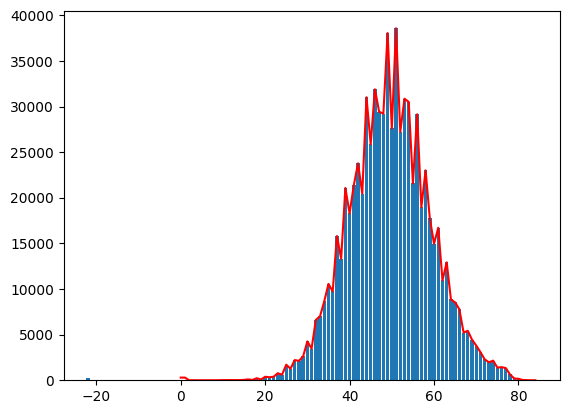

In [32]:
n = np.unique(sorted_notes, return_counts=True)

s = {n[0][i]: np.sum(sorted_notes == n[0][i]) for i in range(1, len(n[0]))}
plt.bar([a -23 for a in s.keys()], s.values())
print(s)

plt.plot(n[1], color='red')

In [33]:
notes, starts, vels = get_data(all_messages_all_files)
show_statistics(notes)

notes_extreme = n[0][n[1] < 100]
print('\n',notes_extreme,len(notes_extreme),'\n')

notes = notes[~np.isin(notes, notes_extreme)]
show_statistics(notes)


763088
[0, 81, 81, 88, 88, 86, 86, 88, 88, 86]
[(107, 2), (28, 2), (27, 2), (106, 2), (24, 2), (29, 4), (30, 4), (31, 4), (26, 8), (32, 10), (105, 16), (36, 20), (33, 20), (34, 20), (37, 22), (35, 24), (104, 32), (40, 38), (38, 44), (42, 80), (39, 98), (103, 162), (102, 200), (41, 228), (0, 295), (1, 295), (44, 330), (43, 386), (45, 388), (47, 610), (101, 634), (46, 772), (49, 1262), (100, 1338), (98, 1388), (99, 1440), (48, 1710), (96, 1976), (51, 2126), (97, 2152), (50, 2216), (95, 2290), (52, 2630), (94, 3078), (54, 3474), (93, 3802), (53, 4258), (92, 4444), (90, 5232), (91, 5422), (55, 6606), (56, 7018), (89, 7780), (88, 8532), (57, 8654), (87, 8858), (59, 9738), (58, 10562), (85, 10950), (86, 12928), (61, 13322), (83, 14964), (60, 15806), (84, 16714), (82, 17736), (63, 18284), (80, 18958), (66, 20464), (62, 21076), (64, 21382), (78, 21570), (81, 23006), (65, 23774), (68, 25872), (75, 27214), (73, 27604), (79, 29156), (71, 29226), (70, 29428), (77, 30512), (76, 30862), (67, 31018),

## Starts


In [34]:
notes, starts, vels = get_data(all_messages_all_files)
show_statistics(starts)

763088
[0, 240, 240, 0, 1560, 0, 60, 0, 60, 0]
[(155520, 1), (183, 1), (184, 1), (1130, 1), (3780, 1), (202, 1), (215, 1), (1125, 1), (227, 1), (3240, 1), (3116, 1), (243, 1), (247, 1), (276, 1), (285, 1), (3108, 1), (953, 1), (3050, 1), (949, 1), (324, 1), (178, 1), (325, 1), (176, 1), (1160, 1), (1395, 1), (1385, 1), (1340, 1), (1335, 1), (1310, 1), (4470, 1), (1202, 1), (1199, 1), (129, 1), (1195, 1), (131, 1), (1194, 1), (141, 1), (145, 1), (4000, 1), (154, 1), (1170, 1), (3990, 1), (164, 1), (172, 1), (948, 1), (945, 1), (933, 1), (799, 1), (548, 1), (553, 1), (558, 1), (795, 1), (582, 1), (583, 1), (590, 1), (792, 1), (638, 1), (639, 1), (658, 1), (683, 1), (693, 1), (696, 1), (707, 1), (709, 1), (711, 1), (717, 1), (525, 1), (496, 1), (487, 1), (485, 1), (351, 1), (352, 1), (2396, 1), (3003, 1), (364, 1), (367, 1), (368, 1), (384, 1), (388, 1), (4920, 1), (912, 1), (2960, 1), (868, 1), (449, 1), (845, 1), (129600, 1), (471, 1), (825, 1), (818, 1), (481, 1), (402, 1), (5040, 1), 

### Round everything


In [35]:
notes, starts, vels = get_data(all_messages_all_files)

# show_statistics(starts)

start_max = 2000
starts[starts >= start_max] = start_max

starts = np.round(starts.copy(), -2).astype(int)

show_statistics(starts)


763088
[0, 200, 200, 0, 1600, 0, 100, 0, 100, 0]
[(1500, 3), (1600, 44), (1800, 52), (1100, 115), (1300, 135), (1700, 153), (1900, 271), (1200, 389), (900, 406), (2000, 492), (800, 766), (600, 799), (1400, 990), (300, 1770), (1000, 3509), (700, 3661), (400, 8916), (500, 19164), (200, 74759), (100, 190863), (0, 455831)]
taille :  21
nb apparition le plus souvent :  455831
nb d'apparition le moins souvent :  3
apparait moins de 100 fois :  3
mediane des apparitions :  766.0


In [36]:
notes, starts, vels = get_data(all_messages_all_files)

a = np.sort(np.random.randint(0, 10, 11))
print(a)
p = 20
for i in range(100//20):
    print(np.percentile(a, p*i))


763088
[0 1 4 5 6 7 8 8 8 9 9]
0.0
4.0
6.0
8.0
8.0


## Velocities

In [37]:
notes, starts, vels = get_data(all_messages_all_files)
vels[vels > 0] = 64

763088


## Combine everything within a single matrix

In [38]:
notes, starts, vels = get_data(all_messages_all_files)

X_vals = np.array([notes, starts, vels]).T
print(X_vals.shape)
print(X_vals[:10])

nunique = np.unique(X_vals, axis=0, return_counts=True)
print(len(nunique[0]))


# notes

n = np.unique(X_vals[:,0], return_counts=True)
print(n)
notes_extreme = n[0][n[1] < 100]
print('\n',notes_extreme,len(notes_extreme),'\n')
X_vals = X_vals[~np.isin(X_vals[:,0], notes_extreme)]

nunique = np.unique(X_vals, axis=0, return_counts=True)
print(len(nunique[0]))

# starts

start_max = 2000
X_vals[:,1][X_vals[:,1] >= start_max] = start_max
X_vals[:,1] = np.where(X_vals[:,1]!=1, np.round(X_vals[:,1].copy(), -2).astype(int),X_vals[:,1]) # dont remove the 1 on the time (which correspond to the end of the song)

nunique = np.unique(X_vals, axis=0, return_counts=True)
print(nunique[0])

# with open('nunique_elements.txt', 'w') as file:
#     for element in nunique[0]:
#         file.write(str(element) + '\n')



# --> dictionary length = 1705

763088
(763088, 3)
[[   0    0    0]
 [  81  240    0]
 [  81  240    1]
 [  88    0    0]
 [  88 1560    1]
 [  86    0    0]
 [  86   60    1]
 [  88    0    0]
 [  88   60    1]
 [  86    0    0]]
10973
(array([  0,   1,  24,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107]), array([  295,   295,     2,     8,     2,     2,     4,     4,     4,
          10,    20,    20,    24,    20,    22,    44,    98,    38,
         228,    80,   386,   330,   388,   772,   610,  1710,  1262,
        2216,  2126,  2630,  4258,  3474,  6606,  7018,  8654, 10562,
        9738, 15806, 13322, 21076, 18

## Tokenize the data

In [76]:
tokenToVals = nunique[0]
print(tokenToVals[:5])
ValsToToken = {tuple(v):i for i,v in enumerate(tokenToVals)}
print(ValsToToken[(1,1,1)])
vocab_size = len(tokenToVals)


[[ 0  0  0]
 [ 1  1  1]
 [41  0  0]
 [41  0  1]
 [41  1  1]]
1


In [40]:
X = np.array([ValsToToken[tuple(x)] for x in X_vals])
print(X[:10])
print(len(X))


a = np.random.randint(0, len(tokenToVals), 10)
print(a)
print([tuple(tokenToVals[i]) for i in a])


[   0 1249 1250 1484 1512 1417 1422 1484 1489 1417]
762634
[ 983  746 1147  681  248 1307  268  795 1014 1275]
[(74, 0, 0), (67, 1400, 1), (78, 500, 0), (66, 0, 1), (53, 500, 0), (82, 1600, 0), (54, 100, 1), (69, 100, 0), (74, 1700, 0), (81, 1900, 0)]


In [75]:
print(len(ValsToToken))

1819


## Apply Transformer

### prepare the data

In [90]:
import torch
import torch.nn as nn
import torch.nn.functional as F

block_size = 256
batch_size = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [91]:
X = torch.tensor([ValsToToken[tuple(x)] for x in X_vals], dtype=torch.long)

In [92]:
n = int(0.9*len(X))
X_train = X[:n]
X_val = X[n:]

In [93]:
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = X_train if split == 'train' else X_val
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

In [94]:
# Signle head self-attention

n_embd = 256
dropout = 0.1

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # input of size (batch, time-step, channels)
        # output of size (batch, time-step, head size)
        B,T,C = x.shape
        k = self.key(x)   # (B,T,hs)
        q = self.query(x) # (B,T,hs)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * k.shape[-1]**-0.5 # (B, T, hs) @ (B, hs, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,hs)
        out = wei @ v # (B, T, T) @ (B, T, hs) -> (B, T, hs)
        return out

In [95]:
# multi-head self-attention

class MultiHead(nn.Module):
    """ multi-head self-attention """

    def __init__(self, n_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(n_heads)])
        self.proj = nn.Linear(n_heads * head_size, n_embd)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        # input of size (batch, time-step, channels)
        # output of size (batch, time-step, channels)
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

In [96]:
class FeedForward(nn.Module):
    """ a simple linear layer followed by a non-linearity """
    
    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, n_embd * 4),
            nn.ReLU(),
            nn.Linear(n_embd * 4, n_embd),
            nn.Dropout()
        )
        
    def forward(self, x):
        out = self.net(x)
        return out

In [97]:
# block

n_heads = 8
# head_size = 64
class Block(nn.Module):
    """ a transformer Block """
    
    def __init__(self, n_embd, n_head):
        super().__init__()
        head_size = n_embd // n_head
        self.MultiHeads = MultiHead(n_heads, head_size)
        self.ffwd = FeedForward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)
        
    def forward(self, x):
        x = x + self.MultiHeads(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

In [154]:
# transformer
vocab_size = len(tokenToVals)
n_layer = 6
class Transformer(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_heads) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd)
        self.lm_head = nn.Linear(n_embd, vocab_size)
        
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
        
    def forward(self, idx, targets=None):
        # print('oouais', idx.shape)
        B, T = idx.shape
        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        # pos_emb = self.position_embedding_table(torch.arange(T)) # (T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss
    
    
    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:] # (B, T)
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [155]:
learning_rate = 1e-2

model = Transformer()
model = model.to(device)
# m=model
print(sum(p.numel() for p in model.parameters()), 'parameters')

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

5669659 parameters


In [156]:
eval_iters = 100

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            # print(X.shape,Y.shape)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    # print(out)
    return out

In [162]:
max_iters = 5000
eval_interval = 500

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

step 0: train loss 4.2081, val loss 4.3314
step 500: train loss 4.2424, val loss 4.4507
step 1000: train loss 4.1594, val loss 4.3669
step 1500: train loss 4.0615, val loss 4.2823
step 2000: train loss 4.0065, val loss 4.2313
step 2500: train loss 4.0347, val loss 4.2565
step 3000: train loss 3.9256, val loss 4.2393
step 3500: train loss 3.8914, val loss 4.1361
step 4000: train loss 3.7619, val loss 4.0768
step 4500: train loss 3.7441, val loss 4.0631
step 4999: train loss 3.8611, val loss 4.1563


In [111]:
# save the model
torch.save(model.state_dict(), 'model1.pth')


## converting it back to music

In [158]:
decode = lambda x: [tokenToVals[i] for i in x]
context = torch.zeros((1,1), dtype=torch.long, device=device)
print(decode(model.generate(context, max_new_tokens=100)[0].tolist()))

[array([0, 0, 0]), array([67,  0,  0]), array([63,  0,  1]), array([66,  0,  0]), array([60,  0,  0]), array([ 60, 200,   1]), array([72,  0,  1]), array([ 70, 200,   1]), array([ 67, 100,   1]), array([60,  0,  0]), array([  56, 1100,    0]), array([61,  0,  1]), array([ 61, 200,   1]), array([57,  0,  0]), array([ 52, 100,   0]), array([57,  0,  1]), array([59,  0,  1]), array([ 56, 500,   1]), array([ 63, 100,   1]), array([65,  0,  0]), array([55,  0,  1]), array([54,  0,  1]), array([69,  0,  1]), array([66,  0,  0]), array([71,  0,  0]), array([74,  0,  0]), array([66,  0,  0]), array([62,  0,  0]), array([79,  0,  1]), array([ 69, 100,   1]), array([60,  0,  1]), array([68,  0,  1]), array([65,  0,  1]), array([71,  0,  0]), array([ 60, 200,   0]), array([69,  0,  0]), array([ 74, 100,   1]), array([67,  0,  0]), array([ 67, 100,   1]), array([ 79, 200,   0]), array([74,  0,  0]), array([74,  0,  1]), array([  67, 1000,    1]), array([67,  0,  1]), array([ 74, 100,   0]), array(

In [159]:
def tokensToMidi(tokens):
    vals = decode(tokens)
    print(vals)
    notes = []
    starts = []
    vels = []
    for t in vals:
        # print(type(t))
        if(np.array_equal(t, [0,0,0])): continue
        notes.append(t[0])
        starts.append(t[1])
        vels.append(t[2])
    createMidiFileWithAllMessages(notes, starts, vels, 'test.mid')

In [163]:
gen1 = model.generate(context, max_new_tokens=100)[0].tolist()

In [164]:
print(gen1)
tokensToMidi(gen1)

[0, 946, 1181, 1178, 1516, 1028, 1139, 1383, 1390, 1383, 1064, 1065, 1096, 1208, 1097, 1417, 1243, 1209, 1212, 984, 1058, 1491, 1280, 1417, 1422, 1597, 1602, 1454, 1316, 1244, 946, 1383, 1709, 1348, 1355, 829, 1279, 1597, 1710, 1489, 1520, 1279, 1544, 1058, 1063, 1597, 1549, 1458, 1619, 1389, 1388, 1207, 1484, 1576, 1517, 1551, 1597, 1489, 1570, 1492, 1549, 1517, 1207, 1618, 1604, 1348, 1353, 1348, 1355, 791, 1097, 1211, 1328, 1211, 1058, 1207, 1136, 1101, 1383, 1388, 1244, 987, 1142, 1279, 1284, 1136, 1597, 1549, 1172, 530, 1549, 1316, 1458, 1171, 755, 1618, 1244, 1207, 1714, 1484, 1647]
[array([0, 0, 0]), array([73,  0,  1]), array([ 79, 400,   0]), array([ 79, 200,   1]), array([89,  0,  0]), array([ 75, 200,   1]), array([ 78, 100,   0]), array([85,  0,  0]), array([ 85, 200,   1]), array([85,  0,  0]), array([ 76, 200,   0]), array([ 76, 200,   1]), array([77,  0,  0]), array([80,  0,  1]), array([77,  0,  1]), array([86,  0,  0]), array([81,  0,  0]), array([80,  1,  0]), array([